# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


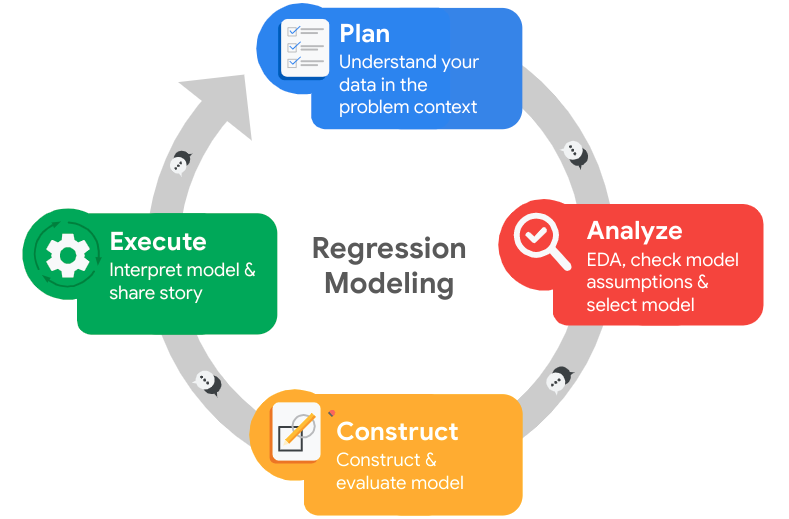

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

1. Who are your stakeholders for this project?
2. What are you trying to solve or accomplish?
3. What are your initial observations when you explore the data?
4. What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
5. Do you have any ethical considerations in this stage?




**Answer:** 
1. Stakeholders for this project are HR department, management of the company.
2. Based on the survey conducted by HR, we try to build the model which can predict if the employee may leave the company.
3. The dataset contains 15000 rows and 10 columns. There were no missing data, but about 3000 duplicates which were deleted. 
4. EDA techniques were handy here: understanding the data, checking for missing values and removing duplicates, checking for outliers and trying to get some sense from them.
5. Before analyzing the dataset and building any model, we should make sure that the dataset does not contain any sensitive information and does not let identify in each row who is the employee behind it. This is seemingly not the case here, there are thousands of entries and it is not too easy to identify who the person is. Moreover, we should think how the mistakes of the model may affect the work and the tenure of employees.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages for data handling
import pandas as pd
import numpy as np

# Import packages for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# Import packages for data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Import metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns = {'Work_accident': 'work_accident',
                           'average_montly_hours': 'average_monthly_hours',
                           'time_spend_company': 'tenure',
                           'Department': 'department'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no any missing values in the whole dataset.

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()

3008

There are 3008 duplicates. This means that 3008 rows are the same as some oter 3008 rows. Thus our real dataset is not 15000 rows, but 11992 rows.

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


It is very unlikely that duplicates are not "duplicates", but the same results for several employees. The dataset contains just around 15 thousand feedbacks with 10 parameters, it is unlikely that more than 3000 employees out 15000 have the identically same feedbacks as some other employees. Therefore, these 3008 duplicates can be treated as some error in the data collection and/or manipulation. They can be dropped.

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep = "first")

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


3008 duplicates were indeed dropped.

### Check outliers

Check for outliers in the data.

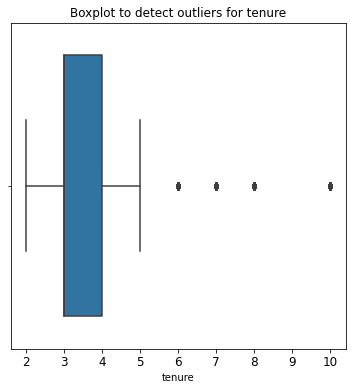

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize = (6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
sns.boxplot(x = df1['tenure'])
plt.show()

In [13]:
df1['tenure'].value_counts()

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: tenure, dtype: int64

In [14]:
# Determine the number of rows containing outliers

# First we fix the 25% and 75% quantiles, which describe the middle where 50% of data is located.
perc25 = df1['tenure'].quantile(0.25)
perc75 = df1['tenure'].quantile(0.75)

# Then we calculate the interquartile range where this 50% of the data lies.
iqr = perc75 - perc25

# Then we can define the range which can be considered as normal, outside of which the values are outliers.
upper_limit = perc75 + 1.5*iqr
lower_limit = perc25 - 1.5*iqr

print("Lower Limiit for outliers: ", lower_limit)
print("Upper Limiit for outliers: ", upper_limit)

# Count number of rows which can be treated as outliers, because their tenure value is either bigger
# than the upper limit or smaller than the lower limit.

# Set a Boolean mask on the dataset to identify the rows containing outliers.
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Print the length or number of rows containing outliers:
print("Total rows with outlierst: ", len(outliers))

Lower Limiit for outliers:  1.5
Upper Limiit for outliers:  5.5
Total rows with outlierst:  824


The total number of rows with outliers is 824. This makes up about 7 % of total data. However, looking at how these "outliers" are distributed, we can treat them in another way. The company was steadily growing and had many people coming and leaving in the last years, therefore, the majority of tenures is between 1.5 and 5.5 years. But looking at the largest tenure of 10 years, we can see that there are more than 100 such people, who may be the founders and the first employees of the company still working there. People working there 7 or 8 years are also present with 81 and 94 persons, respectively. These can be more experienced employees who joined the company a bit later than it was founded or may have left the company in recent years, but had been there since foundation or a bit later time.

Therefore, these "outliers" may be actually quite logical values standing there for people who are the most experienced within the company.

There are no outliers on the lower side of the tenure. There are no any employees who worked there less than 2 years.

Certain types of models are more sensitive to outliers than others. When we get to the stage of building our model, we may consider whether to remove outliers, based on the type of model we decide to use. However, purely from logical sense, these outliers are "outliers" in comparison to most of the data, but not real outliers.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

1. What did you observe about the relationships between variables?
2. What do you observe about the distributions in the data?
3. What transformations did you make with your data? Why did you chose to make those decisions?
4. What are some purposes of EDA before constructing a predictive model?
5. What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
6. Do you have any ethical considerations in this stage?




## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [15]:
# Get numbers of people who left vs. stayed
df1['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [16]:
# Get percentages of people who left vs. stayed
df1['left'].value_counts(normalize = True)

0    0.833959
1    0.166041
Name: left, dtype: float64

The data is imbalanced, showing that about 17% of employees left and 83% of employees are still in the company.

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

### Plot 1. Working hours, number of projects analysis.

The first idea that comes here is to check the distribution of employees based on the number of projects they are involved in. Here, it would be good to see the split between employees who left the company or still stay there. This can be shown as a histogram. Moreover, it can be interesting to build next to it another chart showing a box plot for employees based on how many hours the employee works (continuous value, x-axis), number of projects involved (discrete value y-axis), as well as differentiate those who stay or leave the company with two colors.

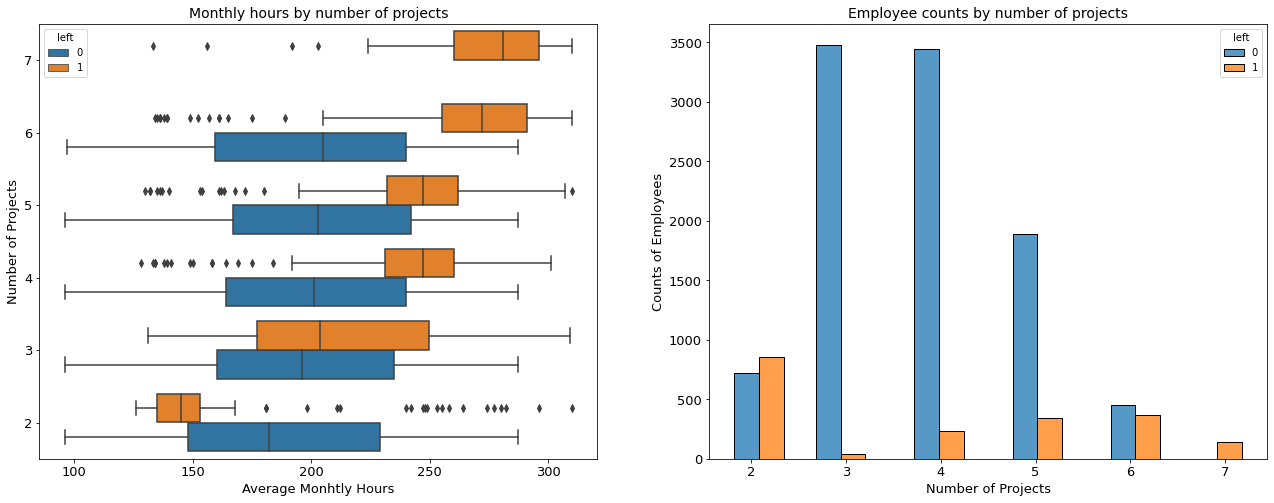

In [17]:
# Create a figure with two subplots described above
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create first subplot (boxplot)
sns.boxplot(data = df1, x = "average_monthly_hours", y = "number_project", hue = "left", orient = "h", ax= ax[0])
ax[0].invert_yaxis()
ax[0].set_title("Monthly hours by number of projects", fontsize = 14)

ax[0].set_xlabel("Average Monhtly Hours", fontsize = 13)
ax[0].set_ylabel("Number of Projects", fontsize = 13)

ax[0].tick_params(axis = 'x', labelsize = 13)
ax[0].tick_params(axis = 'y', labelsize = 13)

# Create second subplot (histogram)
sns.histplot(data = df1, x = "number_project", hue ="left", multiple = "dodge", shrink = 3, ax = ax[1])
ax[1].set_title("Employee counts by number of projects", fontsize = 14)

ax[1].set_xlabel("Number of Projects", fontsize = 13)
ax[1].set_ylabel("Counts of Employees", fontsize = 13)

ax[1].tick_params(axis = 'x', labelsize = 13)
ax[1].tick_params(axis = 'y', labelsize = 13)

Important conclusions from this plot.

1) The proportion of employees who left is the lowest for the employees that worked on 3 or 4 projects. This may  be the most optimal project load for an employee. It is highest for those, who worked on 7 projects. It seems that all employees who were involved in 7 projects tended to leave the company. Also almost a half of those that worked on 6 projects left the company.

2) There is more than 50% of employees who worked only on 2 projects, but left. There can be two reasons:
- People were underloaded and found the work boring, thus they decided to leave.
- People were in their notice period and they did not get any new projects (this is seen from the box plot, such employees with 2 projects which left worked between 140 and 155 hours on average instead of standard 170 hours / month). Or maybe they were in part-time (85-90 hours a week) but working extra up to 140-155 hours caused them to leave.

3) From the box plot we can see a clear trend for both current and past employees that with increasing number of projects the number of working hours increased drastically. The employees that left the company worked on average much more than those who stayed in the company. E.g., those who worked on 4-5 projects and left were working about 250 hours a month, meaning they worked about 12 hours a day instead of 8 hours. While for the same cohorts of people working on 4-5 projects, we can see clearly that the employees who stayed in the company, worked on average less (200-210 hours, about 9-10 hours a day). This can mean that employees may have had some burnout and were sick and tired of such work and left.

In [18]:
# Confirm that all employees that have ever had 7 projects left the company.
df1[df1['number_project'] == 7]['left'].value_counts()

1    145
Name: left, dtype: int64

### Plot 2.

Next, we can analyse how much the number of working hours is related to the satisfaction of employees. For this, we can build a scatter plot.

Text(0.5, 1.0, 'Monthly hours vs. Satisfaction Level')

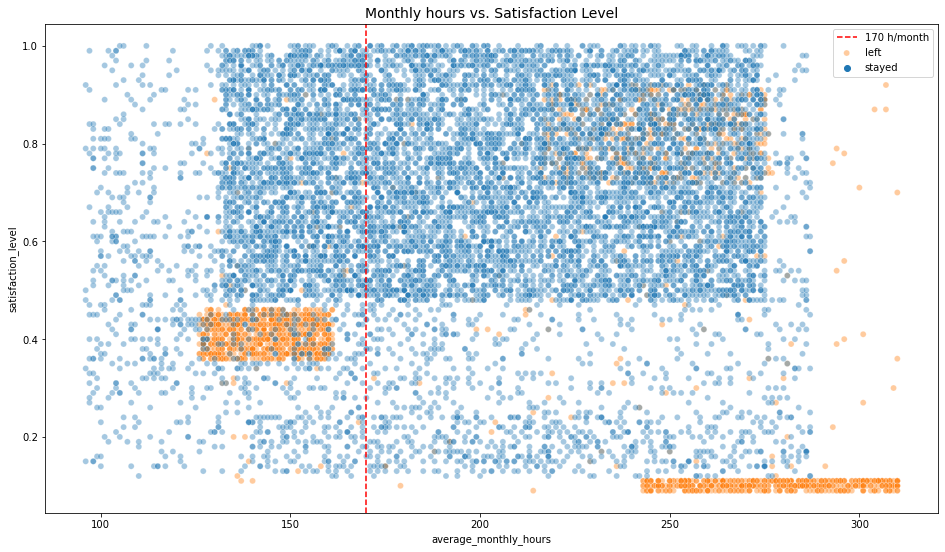

In [19]:
# Create a plot as needed
plt.figure(figsize =(16,9))

sns.scatterplot(data = df1, x = "average_monthly_hours", y = "satisfaction_level", hue = "left", alpha = 0.4)
plt.axvline(x = 170, color = "red", label = "170 h/month", ls = "--")
plt.legend(labels = ["170 h/month", "left", "stayed"])
plt.title('Monthly hours vs. Satisfaction Level', fontsize = 14)

There is a clear pattern for some synthetic data or the data that was manipulated, as we can distinguish one huge rectangle of employees who stayed and 3 rectangles of those who left. Such clear shapes should not normally be seen on the raw data.

It is possible to draw the following conlusions:

1) A group of employees who worked 240-315 hours and have the satisfaction level below 0.1 left the company, as their working hours were far above the average 170 hours per month, probably they fully lost their work and life balance and got dissatisfied, thus wanted to change the company and get a more balanced job.

2) It is seen that no matter how satisfied were they employees, they left the company if they worked more than 285 hours a month, which may be a clear indicator that people may have liked the job, but no work-life balance made them leave the company.

3) There is an "interesting" group of employees that used to work between 225 and 275 hours a month, had a high satifsaction rating (0.7-0.9), but still left the company. There might be some other reasons behind it.

4) The biggest group of employees that had the satisfaction above 0.5 and worked between 130 and 280 hours stayed in the company.

5) Some group of employees that worked between 135 and 160 hours and had the satisfaction between 0.35 and 0.45 left the company. This may be related to the reasons named above: part-time employees working more than supposed and getting unhappy, full-time employees in the notice period reducing their working hours, or these normal employees who felt the pressure from peers that worked twice more than them and therefore these normal employees left.

Let's further have a look how the tenure (experience years within this company) influenced the satisfaction level. For this, we can build a combined plot (the first one with the box plots showing how the tenure affected the satisfaction; the second one with the count of people in the stayed/left groups based on their tenure).

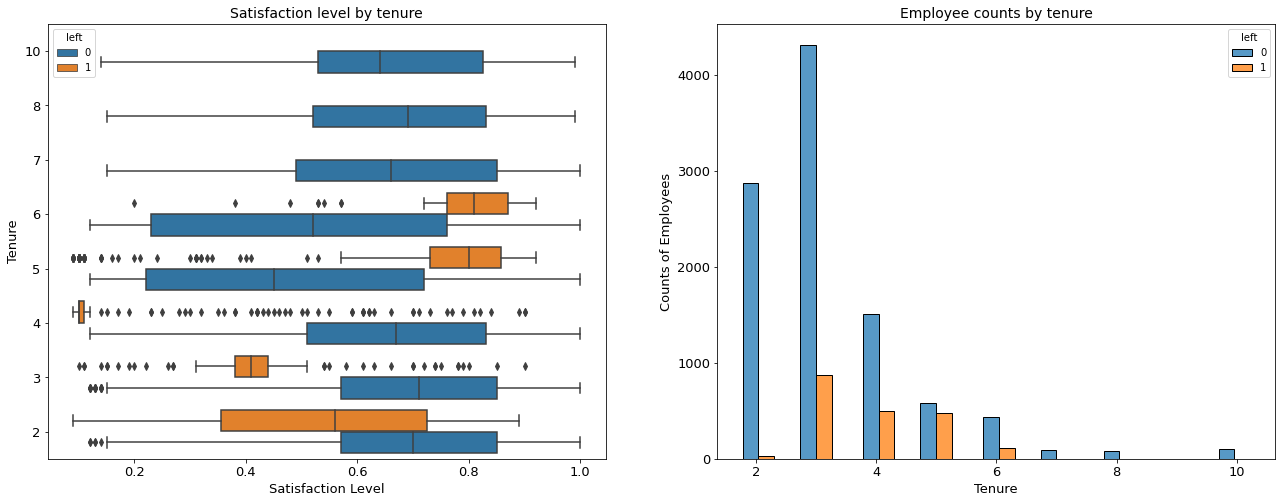

In [20]:
# Create a figure with two subplots described above
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create first subplot (boxplot)
sns.boxplot(data = df1, x = "satisfaction_level", y = "tenure", hue = "left", orient = "h", ax= ax[0])
ax[0].invert_yaxis()
ax[0].set_title("Satisfaction level by tenure", fontsize = 14)

ax[0].set_xlabel("Satisfaction Level", fontsize = 13)
ax[0].set_ylabel("Tenure", fontsize = 13)

ax[0].tick_params(axis = 'x', labelsize = 13)
ax[0].tick_params(axis = 'y', labelsize = 13)

# Create second subplot (histogram)
sns.histplot(data = df1, x = "tenure", hue ="left", multiple = "dodge", shrink = 6, ax = ax[1])
ax[1].set_title("Employee counts by tenure", fontsize = 14)

ax[1].set_xlabel("Tenure", fontsize = 13)
ax[1].set_ylabel("Counts of Employees", fontsize = 13)

ax[1].tick_params(axis = 'x', labelsize = 13)
ax[1].tick_params(axis = 'y', labelsize = 13)

Main conclusions:

1) Employees with the longest tenure (7,8 and 10 years) have not left the company. However, this is a bit tricky, as we do not know when the survey was conducted. It is possible that some of such experienced employees left a bit earlier and therefore are not seen in the survey results.

2) The highest proportion of people who left the company is among thos who work 5 years. There are also significantly many employees who left the company among those with 3-4 years of experience.

3) Most of the current employees that took part in the survey work in the company 2-3 years (about 8 thousand out of about 12 thousand). The employees of this group that are still with the company have on average as high satisfaction rates as those in the group of most experienced colleagues (7-10 years expeience) about 0.6-0.9.

Let's have a look at the average satisfaction level of two groups: stayed and left.

In [21]:
df1.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


The satisfaction level of those who left was much lower than of those who stayed. The mean of retained employees is lower than the median, meaning that the data is skewed towards left.

Let's see how the salaries are distributed among employees with the various tenure level in the company. 

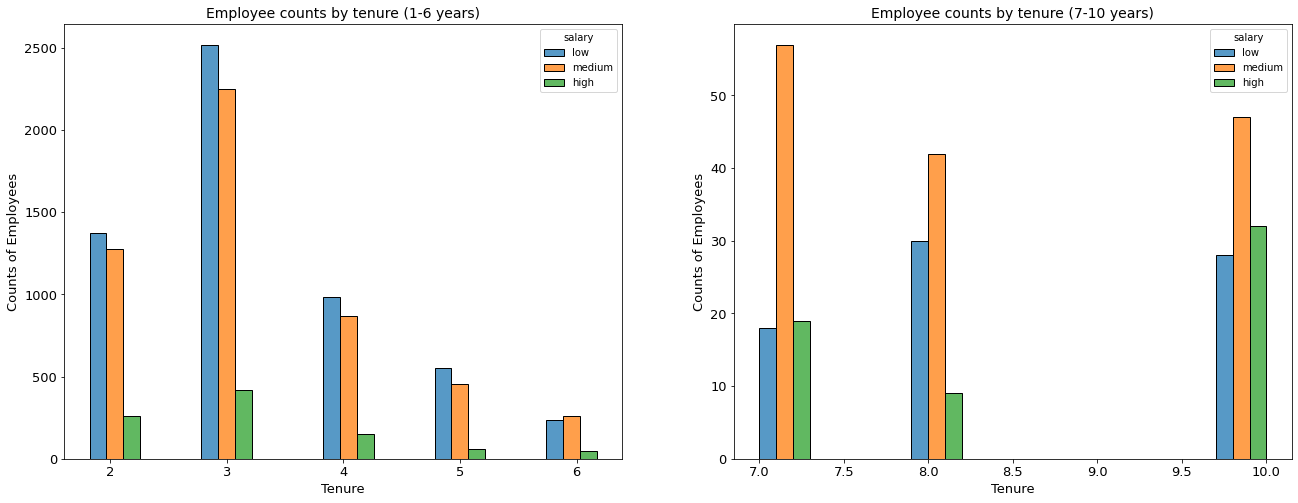

In [22]:
# Create a figure with two subplots described above
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short and long-tenure employees
long_tenure = df1[df1['tenure'] >=7]
short_tenure =df1[df1['tenure'] <= 6]

# Build two plots: first with the employees having 6 or less experience years, second with 7 or more years
sns.histplot(data = short_tenure, x = "tenure", hue ="salary", multiple = "dodge", shrink = 5, ax = ax[0])
ax[0].set_title("Employee counts by tenure (1-6 years)", fontsize = 14)

ax[0].set_xlabel("Tenure", fontsize = 13)
ax[0].set_ylabel("Counts of Employees", fontsize = 13)

ax[0].tick_params(axis = 'x', labelsize = 13)
ax[0].tick_params(axis = 'y', labelsize = 13)

sns.histplot(data = long_tenure, x = "tenure", hue ="salary", multiple = "dodge", hue_order = ['low', 'medium', 'high'],
             shrink = 1, ax = ax[1])
ax[1].set_title("Employee counts by tenure (7-10 years)", fontsize = 14)

ax[1].set_xlabel("Tenure", fontsize = 13)
ax[1].set_ylabel("Counts of Employees", fontsize = 13)

ax[1].tick_params(axis = 'x', labelsize = 13)
ax[1].tick_params(axis = 'y', labelsize = 13)

As seen from these graphs, the salary distribution among each grade of tenure is different. For less experienced colleagues there is a clear trend that about the half of the employees in each group earn low salaries, only some percent earn high salaries, while for experienced employees the majority earns medium or high salaries, the minority (20-25%) earn low salaries.

It may be meaningful to explore not only the self-give satisfaction level of the employee (satisfaction_level), but also that one given in the last performance review (last_evaluation). For this, we can build a graph similar to the one done before - scatter plot showing the employee last performance review against the number of working hours.

Text(0.5, 1.0, 'Monthly hours vs. Last Evaluation Score')

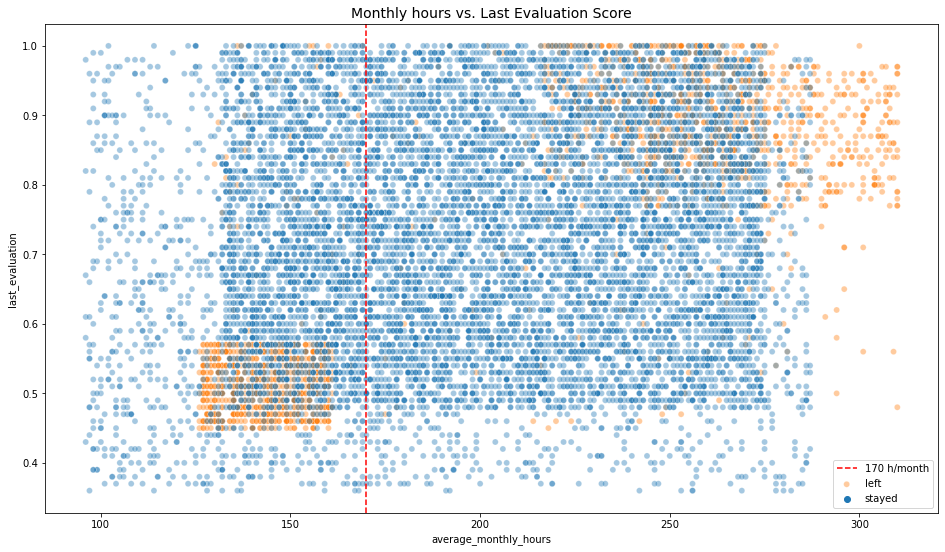

In [23]:
# Create a plot as needed
plt.figure(figsize =(16,9))

sns.scatterplot(data = df1, x = "average_monthly_hours", y = "last_evaluation", hue = "left", alpha = 0.4)
plt.axvline(x = 170, color = "red", label = "170 h/month", ls = "--")
plt.legend(labels = ["170 h/month", "left", "stayed"])
plt.title('Monthly hours vs. Last Evaluation Score', fontsize = 14)

The following observations can be made.

1) Majority of employees worked more than the average 170 hours per month.

2) The great number of working hours does not alwys guarantee the high evaluation score.

3) There are two groups of employees who left the company:
- one working between 125 and 160 hours and received evaluation score between 0.45 and 0.6
- second working much more than the average hours: 220-320 hours per month and received very high evaluation score between 0.8 and 1.0

4) There are barely any employees who worked more than 290 hours and were retained in the company. Seemingly almost all or all of them left.

It can be interesting to see if people who got in recent years a promotion tend to leave the company or not. Let's build a plot depicting this.

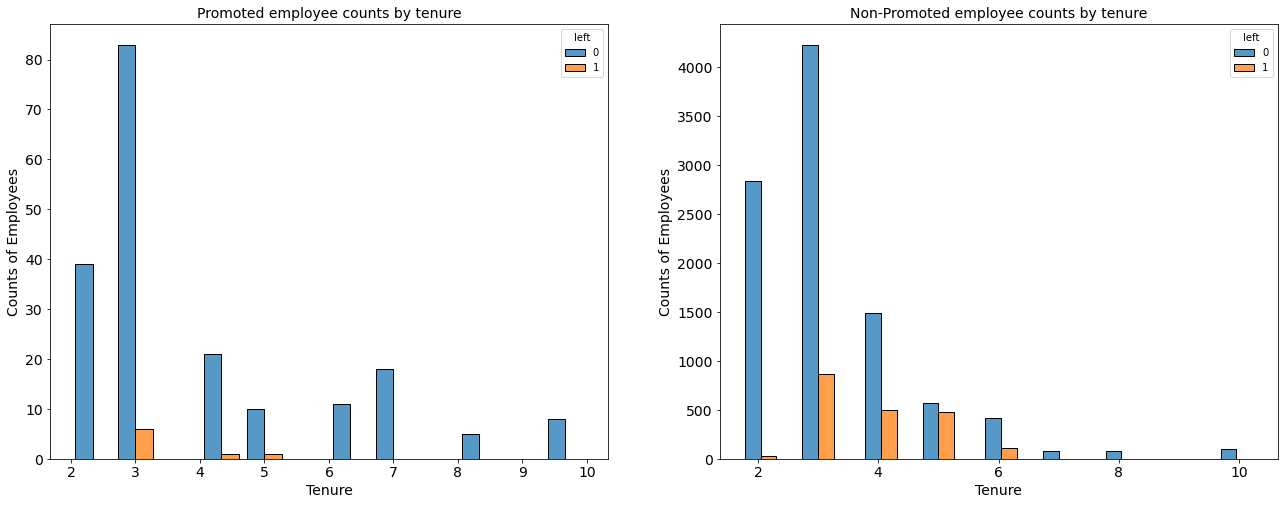

In [24]:
# Create a figure with two subplots described above
fig, ax = plt.subplots(1, 2, figsize = (22,8))

promoted = df1[df1['promotion_last_5years'] == 1]
not_promoted = df1[df1['promotion_last_5years'] == 0]

sns.histplot(data = promoted, x = "tenure", hue ="left", multiple = "dodge", shrink = 0.8, ax = ax[0])

ax[0].set_title("Promoted employee counts by tenure", fontsize = 14)

ax[0].set_xlabel("Tenure", fontsize = 14)
ax[0].set_ylabel("Counts of Employees", fontsize = 14)

ax[0].tick_params(axis = 'x', labelsize = 14)
ax[0].tick_params(axis = 'y', labelsize = 14)

sns.histplot(data = not_promoted, x = "tenure", hue ="left", multiple = "dodge", shrink = 6, ax = ax[1])

ax[1].set_title("Non-Promoted employee counts by tenure", fontsize = 14)

ax[1].set_xlabel("Tenure", fontsize = 14)
ax[1].set_ylabel("Counts of Employees", fontsize = 14)

ax[1].tick_params(axis = 'x', labelsize = 14)
ax[1].tick_params(axis = 'y', labelsize = 14)

In [25]:
df1['promotion_last_5years'].value_counts()

0    11788
1      203
Name: promotion_last_5years, dtype: int64

In [26]:
df1['promotion_last_5years'].value_counts(normalize = True)

0    0.983071
1    0.016929
Name: promotion_last_5years, dtype: float64

From the graph and the statistics above the following is obvious:

1) Only a very small number of employees got promoted (1.6%).

2) Proportion of employees leaving the company among those who were promoted is very low (~ 10 people out of 203, i.e. only every 20th promoted employee left the company), while the proportion of employees who left the company is much higher among those who were not promoted (~ 2000 people out of 11788, every 6th non-promoted employee left the company).

Let's see additionally if working abnormally much (280 hours and more) led to promotion.

In [27]:
working_over_280h =df1[df1['average_monthly_hours'] >= 280]
working_over_280h['promotion_last_5years'].value_counts()

0    365
1      3
Name: promotion_last_5years, dtype: int64

In [28]:
working_over_280h.groupby(['left'])['promotion_last_5years'].count()

left
0    113
1    255
Name: promotion_last_5years, dtype: int64

As we can see, only 3 out of 368 employees that used to work more than 280 hours a month were promoted (which is about 0.8% and even less than the average promotion perccentage of 1.6% within the whole dataset). Moreover, it is clear that 255 out of 368 employees who worked enormously much (280+ hours a month) resigned from the company, this is about 70% of them.

Let's see how the employees are distributed within the departments.

In [29]:
df1['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

As expected naturally, some departments have more employees than the others. Sales, technical and support department host more than the half of all employees, while other 7 deparments have less than half of all employees.

Let's see how the counts of retained and left employees is distributed within departments.

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text major ticklabel objects>)

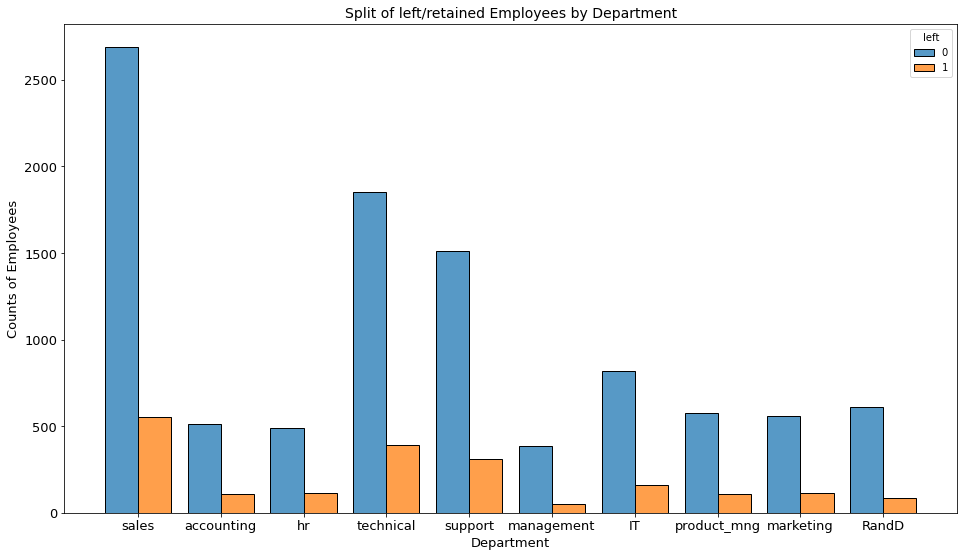

In [30]:
# Histogram
plt.figure(figsize =(16,9))

sns.histplot(data = df1, x = "department", hue ="left", multiple = "dodge", shrink = 0.8)

plt.title("Split of left/retained Employees by Department", fontsize = 14)

plt.xlabel("Department", fontsize = 13)
plt.ylabel("Counts of Employees", fontsize = 13)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

There are no departments that have significantly more or less retained/left employees than on average. Let's check in the end, before modelling, how strong is correlation between various variables.

Text(0.5, 1.0, 'Correlation Heatmap')

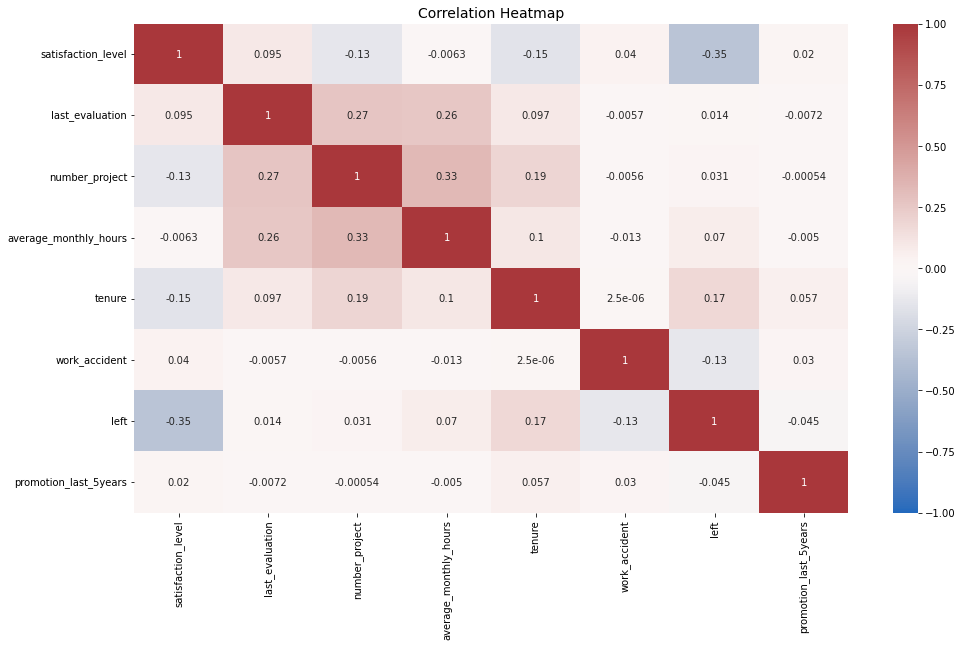

In [31]:
# Heat map with correlations

plt.figure(figsize =(16,9))

heatmap = sns.heatmap(df1.corr(), vmin = -1, vmax = 1, annot = True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title("Correlation Heatmap", fontsize=14)

As we can naturally expect, there is some negative correlation between the satisfaction level and if the person left the company. There is some positive correlation between number of project and working hours. There is some slight positive correlation between the tenure and if the person left company. Moreover, there is some positive correlation between last_evaluation result and number of projects (as well as average monthly hours), which is logical, people working on more projects and successfully delivering them may get better evaluation scores.

### Insights

It appears that employees are leaving the company as a result of poor management and lack of proper control of the workload. Leaving is tied to extremely longer working hours, huge number of projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not to receive any promotions or good evaluation scores (and probably a good bonus based on this). There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave that often as employees who worked less than 6 years in the company.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

It is a calssification task. There are two possible categorical values of the outcome variable: employee left (1) and employee stays (0) in the company. 

### Identify the types of models most appropriate for this task.

As the variable we would like to predict is a categorical variable, we can use the logistic regression model for it. Moreover, we can even check some of the more complex models, i.e. tree-based machine learning models.

### Modeling Approach A: Logistic Regression


Firstly, we should encode the categorical variables.

In [32]:
df_enc = df1.copy()

df_enc['salary'] = df_enc['salary'].map({"low": 0, "medium": 1, "high": 2})

df_enc = pd.get_dummies(df_enc, drop_first = False)

df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Let's create a heatmap to see how the variables are correlated between each other.

Text(0.5, 1.0, 'Correlation Heatmap of the Dataset')

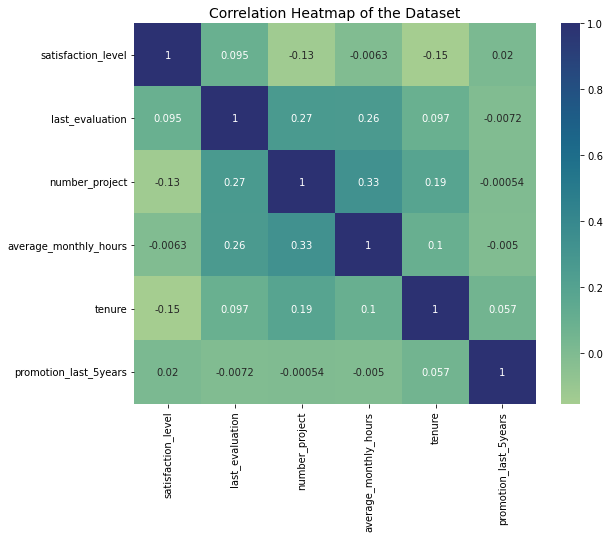

In [33]:
plt.figure(figsize = (9,7))
heatmap = sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure', 
                              'promotion_last_5years']].corr(), annot = True, cmap="crest")
heatmap.set_title("Correlation Heatmap of the Dataset", fontsize=14)

Let's suppose for now that outliers here are not that critical and will continue with building the logistic regression model without removing the outliers.

In [34]:
df_logreg = df_enc.copy()

# Isolate y variable
y = df_logreg['left']

# Isolate X variable
X = df_logreg.drop('left', axis = 1)

Let's split the data and create train and test datasets.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25, stratify = y)

Let's construct the logistic regression model and fit it to the training dataset we created in the step above.

In [36]:
log_clf = LogisticRegression(random_state = 42, max_iter = 500).fit(X_train, y_train)

Now we can use the hold-out sample of X_test and y_test to see how the model predicts.

In [37]:
y_pred = log_clf.predict(X_test)

For a better representation of how the model predicts, we can create the confusion matrix.

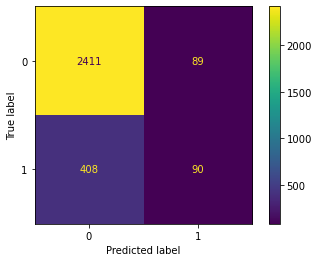

In [38]:
log_cm = confusion_matrix(y_test, y_pred, labels = log_clf.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix = log_cm, display_labels = log_clf.classes_)

log_disp.plot(values_format = '')

plt.show()

Without digging much into results, we can see that the model fails to identify most of the people who left the company (only 90 out of 498), it also assigned 89 employees as those who left, though they stayed in the company. Let's revisit the model by removing outliers (though their nature is essential, these are just some employees that have been working in the company for many years).

In [39]:
df_logreg1 = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Isolate y variable
y1 = df_logreg1['left']

# Isolate X variable
X1 = df_logreg1.drop('left', axis = 1)

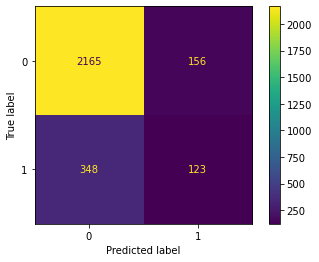

In [40]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state = 42, test_size = 0.25, stratify = y1)

log_clf1 = LogisticRegression(random_state = 42, max_iter = 500).fit(X_train1, y_train1)

y_pred1 = log_clf1.predict(X_test1)

log_cm1 = confusion_matrix(y_test1, y_pred1, labels = log_clf1.classes_)

log_disp1 = ConfusionMatrixDisplay(confusion_matrix = log_cm1, display_labels = log_clf1.classes_)

log_disp1.plot(values_format = '')

plt.show()

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

As we can see, the results are slightly better, when we got rid of outliers. More cases that the employee left the company were predicted, but at the same time the number of falsely predicted cases increased (156 vs 89 in a previous iteration), i.e. an employee did not leave the company, but the model predicted that he/she did. The number of employees who left the company but were not spotted decreased from 408 to 348, which is still quite a high value meaning that we still significantly fail to spot the employees that leave the company.

Let's check how balanced/imbalanced was the dataset we used for the latest logistic regression.

In [41]:
df_logreg1['left'].value_counts(normalize = True)

0    0.831468
1    0.168532
Name: left, dtype: float64

There is a ratio of 83 to 17 between those who stayed in and those who left the company. This split is quite imbalanced, but not that severe that we would have needed to apply some resampling. Therefore, we can continue with summarizing the results for this logistic regression model.

In [42]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      2321
           1       0.44      0.26      0.33       471

    accuracy                           0.82      2792
   macro avg       0.65      0.60      0.61      2792
weighted avg       0.79      0.82      0.80      2792



As the dataset is quite imbalanced, the model has naturally better metrics for "0" (would not leave) than for "1" (would leave). As our goal is to identify the employees who may potentially leave, we would take the row with the results for "1" as a basis: f1-score is a weighted metric of precision and recall. It is quite low (0.33). Some other models should be tried out or this model should be improved by some means (cleaning data, getting rid of some features, addition of extra features, better splitting, resampling, etc.) 

### Modeling Approach B: Random Forest Model


Let's first isolate the target and independent variables, split them into training / test sets.

In [43]:
y = df_enc['left']
X = df_enc.drop('left', axis = 1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25, stratify = y)

#### Random Forest Model - Iteration 1

Let's construct a random forest model and set up a cross-validated grid search to search for the best model parameters.

In [45]:
# Instantiate the model
rf = RandomForestClassifier(random_state = 0)

# Set up the scoring metrics
scoring = {'precision', 'recall', 'accuracy', 'f1', 'roc_auc'}

# Set up the parameters to be used for the grid search
cv_params = {'max_depth': [5, None], 
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1, 3],
             'min_samples_split': [2, 4],
             'n_estimators': [300],
             } 

# Instantiate the grid search
rf_cv = GridSearchCV(rf, cv_params, scoring = scoring, cv = 4, refit ="f1")

In [46]:
# Fit the model
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

Now we can save this model (in case we would need to use it later). For this we should define the path, as well as create pickle functions.

In [47]:
# Path, where our model should be saved
path = r"D:\Germany\Data Science and Analytics\Сourses\Coursera - Google Advanced Data Analytics\Course 7 Capstone Project"

In [48]:
# Defining a function to pickle the model

def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where we wish to save the pickle
        model_object: a model that we want to pickle
        save_as:      filename for how we want to save the model, string type

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [49]:
# Defining a function to read the pickled model

def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where we want to read from
        saved_model_name: filename of pickled model we want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [50]:
# Write the model
write_pickle(path, rf_cv, 'hr_rf1')

In [51]:
# Read the model
rf1 = read_pickle(path, 'hr_rf1')

In [52]:
# Identifying the best possible score (f1)
rf1.best_score_

0.9504432122727458

In [53]:
# Model parameters for reaching the best score
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

As there might be several iterations of this model or we can try out some other models, it would be good to have a function the summarizes all metrics a table.

In [54]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what we want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): our metric we aim at - precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, auc and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [55]:
rf1.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=1.0,
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [70]:
rf1_cv_results = make_results('Random Forest 1', rf1, 'f1')
print(rf1_cv_results)

             model  precision    recall        F1  accuracy       auc
0  Random Forest 1   0.984242  0.918956  0.950443  0.984099  0.976425


This model demonstrates quite high scores as compared to the logistic regression model we explored before. 

Let's create a function that would take the holdout sample (test dataset) for the model, predict values, then get the model metrics for this testing.

In [57]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How we want our model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for our model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [58]:
rf1_test_scores = get_scores("Random Forest 1 Test", rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,Random Forest 1 Test,0.989316,0.929719,0.958592,0.986658,0.963859


The obtained results for the test sample are close to those received within the validation. The results are high and strong. The test set was used only on the ready model, it was not a part of the training procedures, so we may be sure that we can expect similar results when we would deal with the new, unseen dataset.

#### Feature Engineering

The results of the model above are surpisingly good. This can be related to the "data leakage". This may happen when the data, that was not supposed to be used for the training of the model, was actually somehow used for the training of the model, or when this is not the real data that we would use when the model is deployed. Such models would result in higher metrics like here, but will predict significantly worse when are exposed to unseen data.

First of all, we would expect that the real data will not have all the satisfaction levels available, i.e., some rows will contain missing values there. Secondly, the column "average_monthly_hours" may have some sort of biased in the dataset we have: it is expected that the employees who were in their notice period worked much less than needed and then got a value "left" in the column "left".

Some feature engineering of these two indicators could be worth checking.

Let's first drop the column "satisfaction" and then rename the column "average_monthly_hours" into "overworked" and then define it as 1 if a person worked more than 180 hours a month (standard time 170 hours a month), and 0 if less.

In [59]:
df2 = df_enc.drop("satisfaction_level", axis = 1)

df2["overworked"] = df2["average_monthly_hours"]

print("Max working hours: ", df2["overworked"].max())
print("Min working hours: ", df2["overworked"].min())

Max working hours:  310
Min working hours:  96


In [60]:
# Convert the column "overworked" to 1 or 0 based on the conditions mentioned above.

df2["overworked"] = (df2["overworked"] > 180).astype(int)

df2["overworked"].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [61]:
# Dropping the existing column "average_monthly_hours"
df2 = df2.drop("average_monthly_hours", axis = 1)
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


Now we can isolate the target variable and the features and then split the dataset into train and test sets.

In [62]:
y = df2['left']

X = df2.drop("left", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 0)

#### Random Forest Model - Iteration 2

Let's conduct the second iteration of the random forest model based on the updated dataset.

In [63]:
# Instantiate the model
rf2 = RandomForestClassifier(random_state = 0)

# Set up the scoring metrics
scoring = {'precision', 'recall', 'accuracy', 'f1', 'roc_auc'}

# Set up the parameters to be used for the grid search
cv_params = {'max_depth': [5, None], 
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1, 3],
             'min_samples_split': [2, 4],
             'n_estimators': [300],
             } 

# Instantiate the grid search
rf2_cv = GridSearchCV(rf, cv_params, scoring = scoring, cv = 4, refit ="f1")

In [64]:
rf2_cv.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [65]:
# Write the model
write_pickle(path, rf2_cv, 'hr_rf2')

In [66]:
# Read the model
rf2 = read_pickle(path, 'hr_rf2')

In [67]:
# Finding the best parameters of the model
rf2.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [68]:
# Checking the best f1-score
rf2.best_score_

0.9002243304389652

In [72]:
# Print cross-validation results of both models
rf2_cv_results = make_results('Random Forest 2', rf2, 'f1')
print(rf1_cv_results)
print(rf2_cv_results)

             model  precision    recall        F1  accuracy       auc
0  Random Forest 1   0.984242  0.918956  0.950443  0.984099  0.976425
             model  precision    recall        F1  accuracy       auc
0  Random Forest 2    0.91268  0.888145  0.900224  0.967308  0.961153


The results of the new feature-engineered random forest model dropped a bit, but let's see how it performs on the new, unknown data from the holdout sample - test set.

In [73]:
rf2_test_scores = get_scores("Random Forest 2 Test", rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,Random Forest 2 Test,0.896761,0.889558,0.893145,0.964643,0.934579


The results on the test sample dropped slightly as compared to the first random forest model, moreover, the results on the test sample were slightly below than those during the cross-validation. This could mean that the feature engineering simplified the model a bit, while still keeping relatively good results. This model is stable and looks less suspicious and prone to "data leakage".

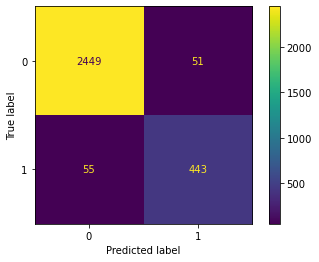

In [74]:
# Building a confusion matrix for the "Random Forest 2" Model
y_pred = rf2.best_estimator_.predict(X_test)

log_cm2 = confusion_matrix(y_test, y_pred, labels = rf2.classes_)

log_disp2 = ConfusionMatrixDisplay(confusion_matrix = log_cm2, display_labels = rf2.classes_)

log_disp2.plot(values_format = '')

plt.show()

The model shows quite solid results. 443 out of (443+55) employees who leave the company were identified (recall score of 0.889). 51 employees were idenitifed as those who would leave, although they are not leaving the company (precision score of 0.897), this is not too critical as the company would pose some measures on these employees to keep them even though they are not planning to leave. The balanced f1-score is 0.893, which is quite good as the model makes sure simultaneously to predict a great number of employees who would like to leave without predicting too many false positives (employees who would leave as per model, though they are not planning to leave).

#### Feature importance investigation of the Random Forest Model

In [76]:
# Extracting an array with the values of feature importances
feat_impt = rf2.best_estimator_.feature_importances_
feat_impt

array([0.34690595, 0.3140254 , 0.21148279, 0.00578842, 0.00068491,
       0.01415069, 0.00172735, 0.00152767, 0.00131082, 0.00117536,
       0.00043707, 0.0005591 , 0.00101203, 0.00474725, 0.00365384,
       0.00461185, 0.08619951])

In [78]:
# Using argpartition to place ten biggest values (in a random order) at the end of the list and receive
# the indeces of these 10 biggest values
indeces = np.argpartition(feat_impt, -10)[-10:]
indeces

array([ 6, 14,  5,  3, 15, 13, 16,  1,  2,  0])

In [79]:
# Get labels of these 10 features
labels = X.columns[indeces]
labels

Index(['department_IT', 'department_support', 'salary', 'work_accident',
       'department_technical', 'department_sales', 'overworked',
       'number_project', 'tenure', 'last_evaluation'],
      dtype='object')

In [80]:
# Applying filter on the feat_impt so that it consists only of 10 most important features
feat_impt = feat_impt[indeces]
feat_impt

array([0.00172735, 0.00365384, 0.01415069, 0.00578842, 0.00461185,
       0.00474725, 0.08619951, 0.3140254 , 0.21148279, 0.34690595])

In [81]:
# Building a dataframe with these features and labels
df_feat = pd.DataFrame({'Feature': labels, 'Importance Value': feat_impt})
df_feat

,Feature,Importance Value
0,department_IT,0.001727
1,department_support,0.003654
2,salary,0.014151
3,work_accident,0.005788
4,department_technical,0.004612
5,department_sales,0.004747
6,overworked,0.086200
7,number_project,0.314025
8,tenure,0.211483
9,last_evaluation,0.346906


In [82]:
# Sort the dataframe based on importance values
df_feat_sort = df_feat.sort_values("Importance Value")
df_feat_sort

,Feature,Importance Value
0,department_IT,0.001727
1,department_support,0.003654
4,department_technical,0.004612
5,department_sales,0.004747
3,work_accident,0.005788
2,salary,0.014151
6,overworked,0.086200
8,tenure,0.211483
7,number_project,0.314025
9,last_evaluation,0.346906


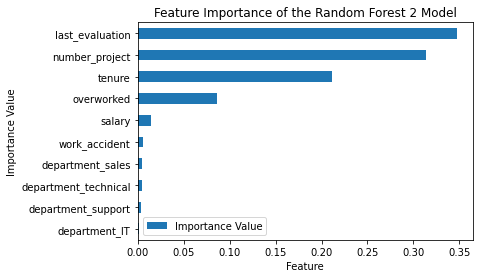

In [86]:
# Plot the graph
fig = df_feat_sort.plot(x = "Feature", y = "Importance Value", kind ='barh')
fig.set_title("Feature Importance of the Random Forest 2 Model")
fig.set_xlabel("Feature")
fig.set_ylabel("Importance Value")
plt.show()

The most important features for the prediction of whether an employee may leave the company are: last_evaluation, number_project, tenure. However, the features overworked and salary are also significant for the prediction.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Within this project, two approaches were tried out: logistic regression and random forest. In the later case we had made two iterations.

Logistic regression presented quite poor results: f1-score of 0.33, thus being not a good model for prediction of employees who may potentially leave. The random forest model (with feature-engineered dataset) demonstrated much better results, f1-score on the test dataset is about 0.89. This model can be useful for the prediction on other unseen datasets, as it spots those who may leave efficiently without making too many mistakes.

### Conclusion, Recommendations, Next Steps

#### Next Steps

In the next steps, if necessary, other types of models can be tried out. While doing this, it is possible to "play" with parameters, use train-validation-test dataset or do a deeper feature engineering to result even in more accurate model.

#### Conclusion and Recommendations

Stakeholders should take actions based on the following insights obtained during the modelling.

- There is a significant problem with overworking. Many employees work 250-270 hours a month and more, meaning working 12 hours a day instead of normal 8 hours. They may be unhappy with such situation. Analysis has shown that many of employees that left were overworking extremely.

- Working hours are connected in most cases to the number of project the employee is working on. More projects - more working hours - more chance to lose an employee. The management should take an action and distribute projects in a better way so that the employees do not overwork drastically. Number of projects together with working hours are one of the strongest influencers if the employee leaves the company.

- The analysis has shown that the employees who have been working in the company between 4-6 years and have not received promotions so far leave the company way more often than the employees with the same experience and promotion. A special focus should be place on this employees: they are experienced, know much, work hard, but do not receive any promotion. It is a big loss for them and for the company.

- The same group of employees (with tenure between 4-6 years) report that their salary is rather low (50+ % say so), while 70-75+ % of those with the tenure of 7-10 years say their salary is rather high or average, but not low. This salary gap and demotivation that after working some years in the company people are still underpaid cause middle-experienced colleagues (4-6 years experience) leave the company.

- There are no any trends for specific departments that employees leave more or less often in one department than in another. It is seemingly the culture of the company to handle multiple projects and work enormous extra hours. This should be balanced.


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.